Importing Libraries and Loading datasets

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
from sklearn.preprocessing import RobustScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.simplefilter(action='ignore', category=Warning)

Loading Datasets

In [140]:
df = pd.read_csv("D:\machine learning\healthcare-dataset-stroke-data.csv")

Exploratory Data Analysis

In [141]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [142]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [143]:
df.shape

(5110, 12)

Missing Values

In [144]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [145]:
(df["bmi"].isnull().sum() / df.shape[0]) * 100

3.9334637964774952

The percentage of missing data in the "bmi" column of a DataFrame "df" is determined by this line of code. 

<Axes: >

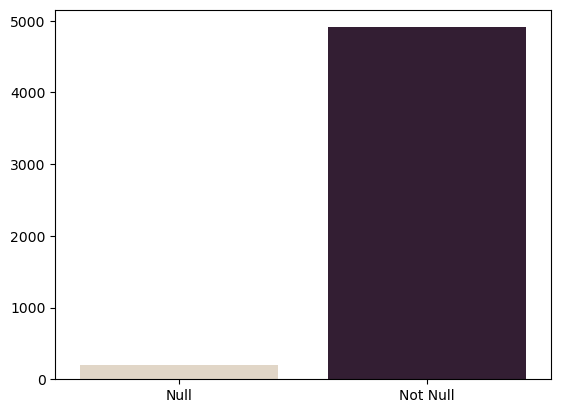

In [146]:
sns.barplot(data=df, x=["Null", "Not Null"], y=[df["bmi"].isnull().sum(), df["bmi"].notnull().sum()], palette="ch:.25")

The code's creating a bar chart for the DataFrame "bmi" column, showing the number of null and non-null values. The x-axis is divided into two categories, "Null" and "Not Null", and the y-axis is the number of values. The bar height indicates the number of values that are in each category.

Categorical and Numerical Variables

In [147]:
def col_names(df):
    #Categorical Variables
    cat_cols = [col for col in df.columns if df[col].dtypes not in ["int64", "float64"]]
    #Numerical Variables
    num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
    #Numerical but Categorical Variables
    num_but_cat = [col for col in num_cols if df[col].nunique() < 12]
    #Adding num_but_cat to cat_cols
    cat_cols = num_but_cat + cat_cols
    #num_but_cat removing from num_cols
    num_cols = [col for col in num_cols if col not in num_but_cat]
    #Categorical but Cardinal Variables
    cat_but_car = [col for col in cat_cols if df[col].nunique() > 12]
    print(f"Numerical Cols: {num_cols} \nCategorical Cols: {cat_cols} \nNumerical but Categorical: {num_but_cat} \nCategorical but Cardinal: {cat_but_car}") 
    return num_cols, cat_cols

In [148]:
num_cols, cat_cols = col_names(df)

Numerical Cols: ['id', 'age', 'avg_glucose_level', 'bmi'] 
Categorical Cols: ['hypertension', 'heart_disease', 'stroke', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] 
Numerical but Categorical: ['hypertension', 'heart_disease', 'stroke'] 
Categorical but Cardinal: []


Analyzing Numerical Variables

In [149]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


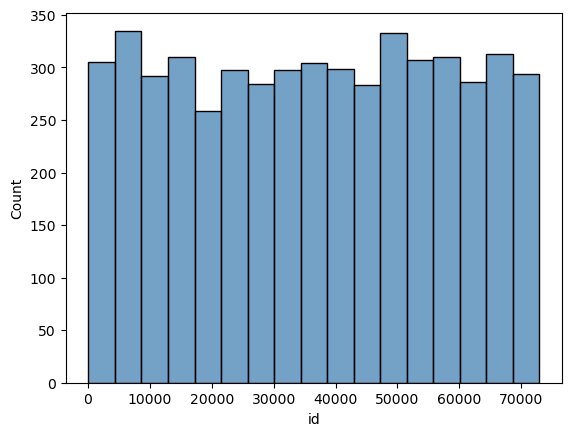

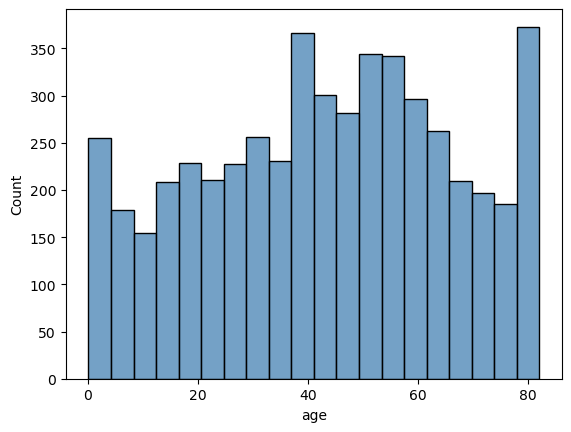

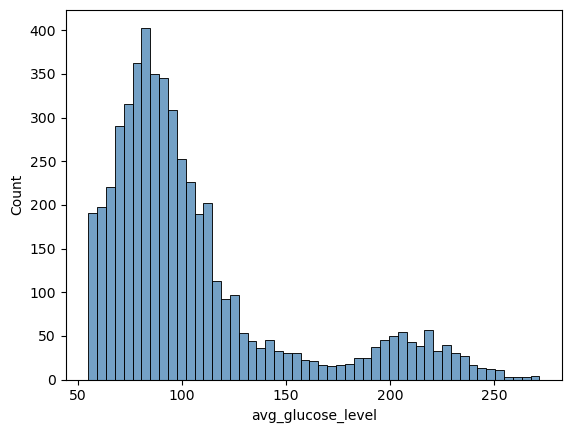

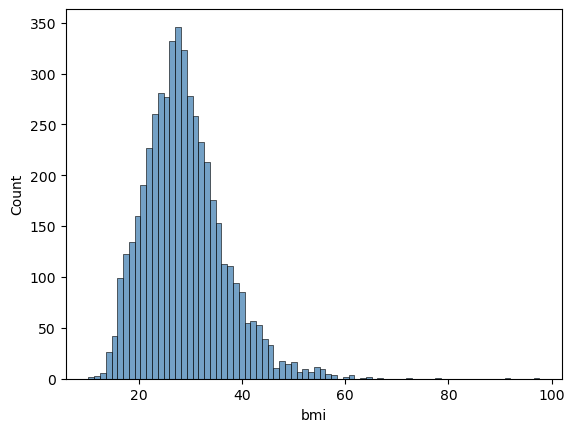

In [150]:
for col in num_cols:
    sns.histplot(x=df[col], data=df, color="steelblue")
    plt.show(block=True)

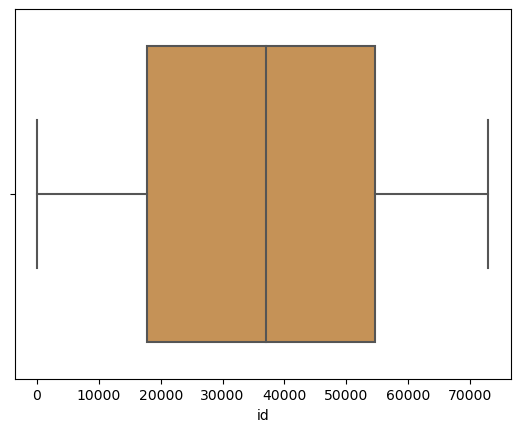

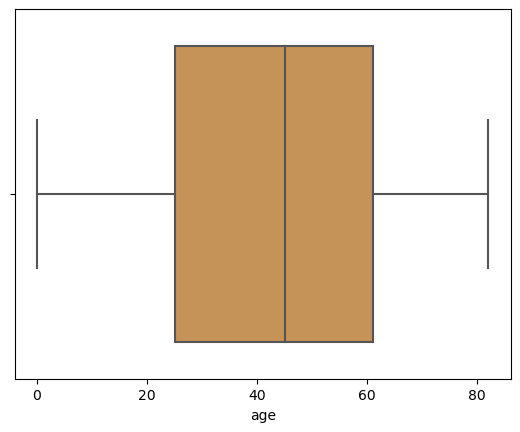

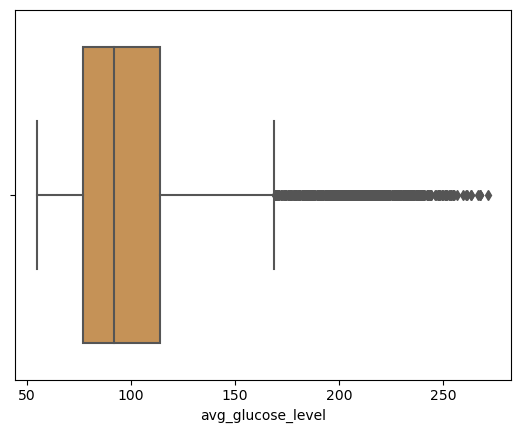

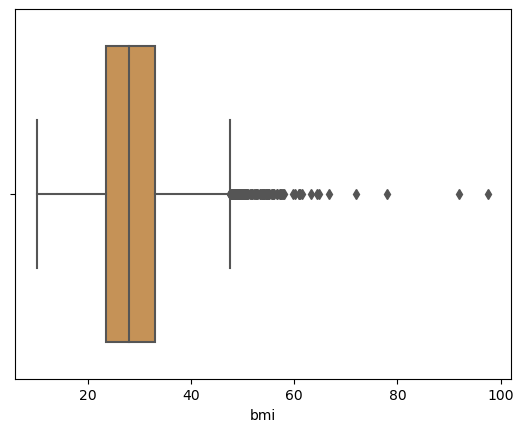

In [151]:
for col in num_cols:
    sns.boxplot(x=df[col], data=df, color="#d79345")
    plt.show(block=True)

Analyzing Target Variable

In [152]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

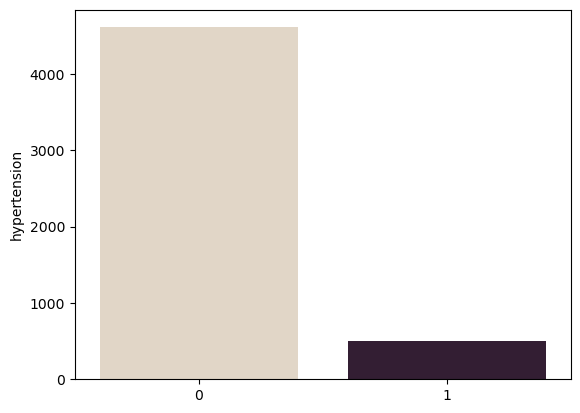

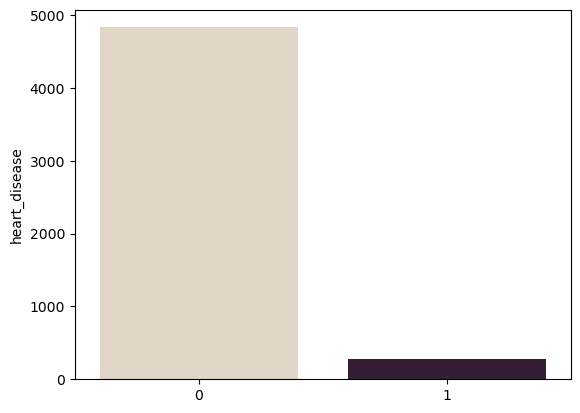

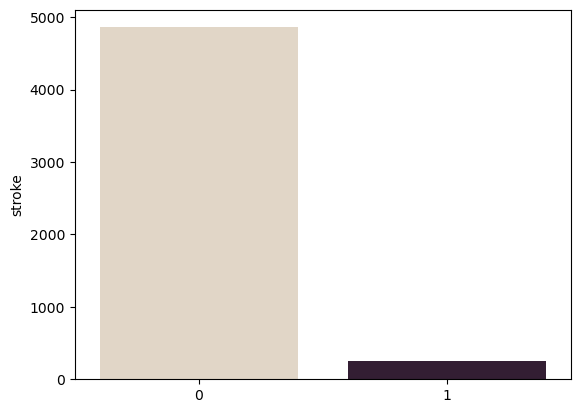

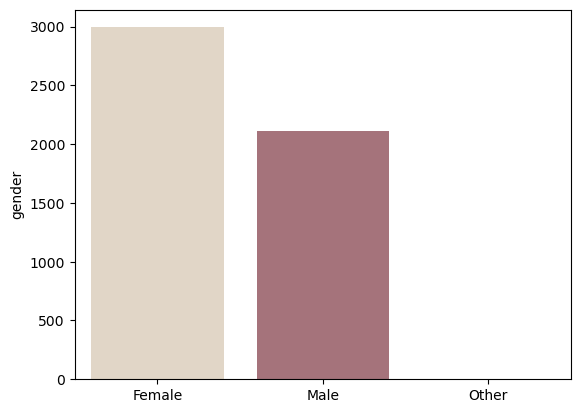

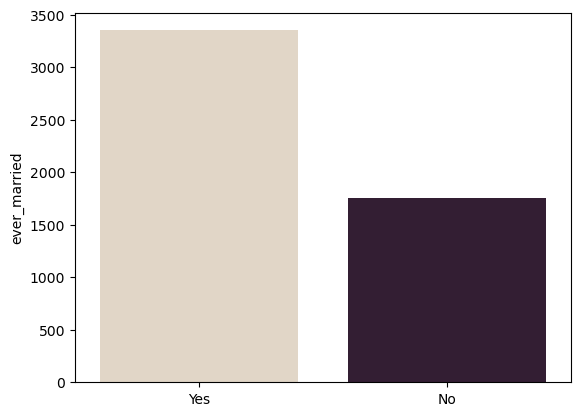

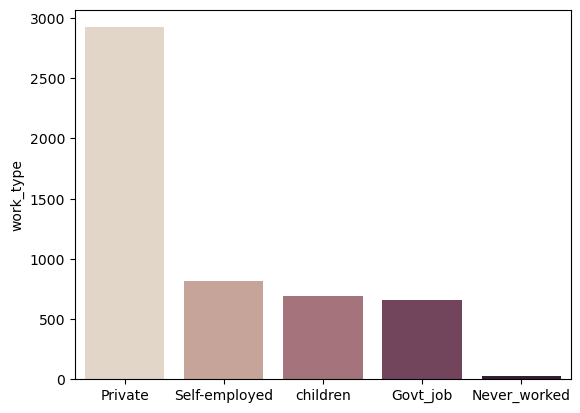

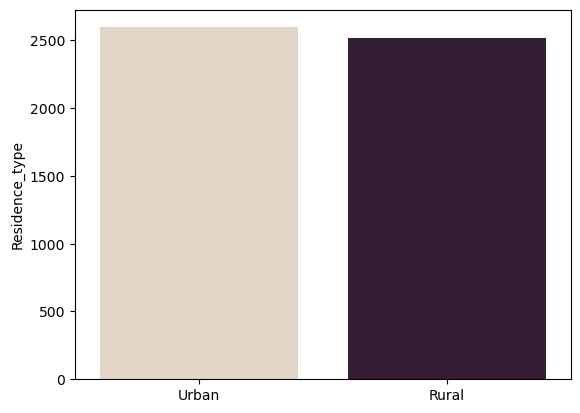

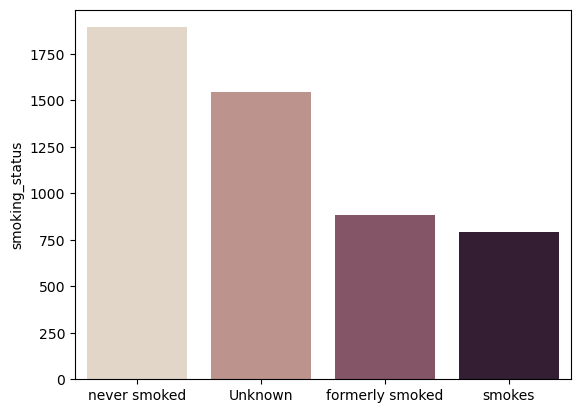

In [153]:
for col in cat_cols:
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts(), palette="ch:.25")
    plt.show(block=True)

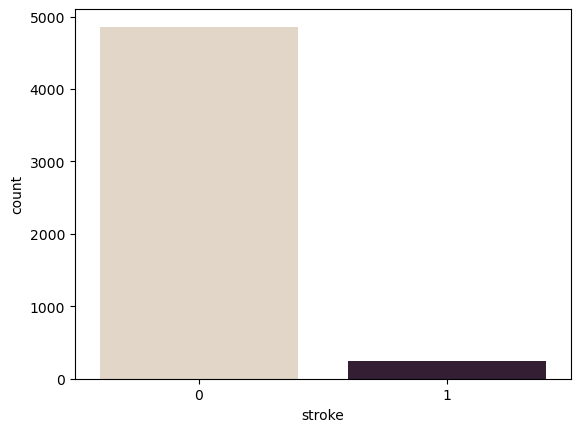

In [154]:
sns.countplot(data=df, x='stroke', palette='ch:.25')
plt.show(block=True)


([<matplotlib.patches.Wedge at 0x19a14d22950>,
 [Text(-1.0871361453364168, 0.16773491438301516, '0'),
  Text(1.284797260350331, -0.19823218657998906, '1')],
 [Text(-0.5929833520016818, 0.09149177148164463, '95.1%'),
  Text(0.7906444679078961, -0.12198903789537788, '4.9%')])

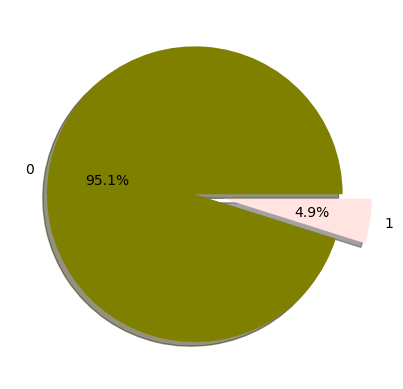

In [155]:
plt.pie(df["stroke"].value_counts(), labels=[0,1], shadow=True, colors=["#808000", "mistyrose"], explode=(0,0.2), autopct="%1.1f%%")

Checking for Outliers in Numerical Variables

Inter quartile range was used when checking for outliers

In [156]:
def check_outliers(df, numerical_cols, low_threshold=0.1, up_threshold=0.9):
    outlier_cols = []
    for col in numerical_cols:
        q1 = df[col].quantile(low_threshold)
        q3 = df[col].quantile(up_threshold)
        interquantile = q3 - q1
        up_limit = q3 + 1.5 * interquantile
        low_limit = q1 - 1.5 * interquantile
        if df[(df[col] > up_limit) | (df[col] < low_limit)].any(axis=None):
            outlier_cols.append(col)
    if not outlier_cols:
        print("There is no outliers")
    return outlier_cols

The check_outliers() function is useful to find the numerical columns in a DataFrame that contain outliers as quickly as possible.

In [157]:
outlier_cols = check_outliers(df, num_cols)

In [158]:
print(outlier_cols)

['bmi']


Correlation

<Axes: >

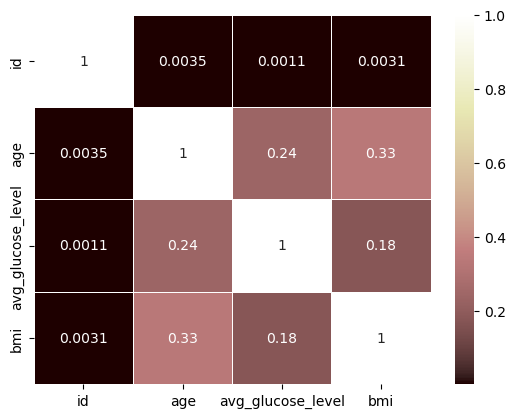

In [159]:
sns.heatmap(df[num_cols].corr(), annot=True, linewidths=0.5, cmap="pink")

Target Variable vs Numerical Columns

In [160]:
for col in num_cols:
    print(df.groupby("stroke").agg({col:"mean"}), end="\n\n")

                  id
stroke              
0       36487.236371
1       37115.068273

              age
stroke           
0       41.971545
1       67.728193

        avg_glucose_level
stroke                   
0              104.795513
1              132.544739

              bmi
stroke           
0       28.823064
1       30.471292



According to the results, the probability of having a stroke increases with age, glucose level and bmi

Target Variable vs Categorical Columns

In [161]:
for col in cat_cols:
    print(pd.DataFrame({"target_mean": df.groupby(col)["stroke"].mean()}), end="\n\n")

              target_mean
hypertension             
0                0.039679
1                0.132530

               target_mean
heart_disease             
0                 0.041787
1                 0.170290

        target_mean
stroke             
0               0.0
1               1.0

        target_mean
gender             
Female     0.047094
Male       0.051064
Other      0.000000

              target_mean
ever_married             
No               0.016505
Yes              0.065613

               target_mean
work_type                 
Govt_job          0.050228
Never_worked      0.000000
Private           0.050940
Self-employed     0.079365
children          0.002911

                target_mean
Residence_type             
Rural              0.045346
Urban              0.052003

                 target_mean
smoking_status              
Unknown             0.030440
formerly smoked     0.079096
never smoked        0.047569
smokes              0.053232



According to the results,

- People with hypertension are more likely to have a stroke
- People with heart disease are more likely to have a stroke
- The probability of having a stroke is higher in men
- People who have been married are more likely to have a stroke
- People who are self-employed are more likely to have a stroke
- The probability of having a stroke is higher in urban life
- The probability of having a stroke is higher in formerly smoked people

# Data Preprocessing & Feature Engineering

Filling Missing Values

Missing values were filled with the median

In [162]:
df.fillna(df["bmi"].median(),inplace=True)

Label Encoder

Label encoder was applied to binary columns

In [163]:
binary_cols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"] and df[col].nunique() == 2]

In [164]:
binary_cols

['ever_married', 'Residence_type']

In [165]:
le = LabelEncoder()

In [166]:
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [167]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,0,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


One-Hot Encoder

One-hot encoder was applied to columns with more than 2 categories

In [168]:
ohe_cols = [col for col in df.columns if 2 < df[col].nunique() < 10]

In [169]:
ohe_cols

['gender', 'work_type', 'smoking_status']

In [170]:
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)

In [171]:
df.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,1,1,228.69,36.6,1,1,0,0,1,0,0,1,0,0
1,51676,61.0,0,0,1,0,202.21,28.1,1,0,0,0,0,1,0,0,1,0
2,31112,80.0,0,1,1,0,105.92,32.5,1,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1,0,0,0,0,1
4,1665,79.0,1,0,1,0,174.12,24.0,1,0,0,0,0,1,0,0,1,0


Dealing with Outliers

Using the iqr method, outliers were replaced with their upper and lower limits

In [172]:
def replace_with_thresholds(df, col, low_threshold=0.1, up_threshold=0.9):
    q1 = df[col].quantile(low_threshold)
    q3 = df[col].quantile(up_threshold)
    interquantile = q3 - q1
    up_limit = q3 + 1.5 * interquantile
    low_limit = q1 - 1.5 * interquantile
    df.loc[(df[col] < low_limit), col] = low_limit
    df.loc[(df[col] > up_limit), col] = up_limit

In [173]:
for col in outlier_cols:
    replace_with_thresholds(df, col)

Checked for outliers again

In [174]:
check_outliers(df, num_cols)

There is no outliers


[]

Feature Scaling

Min-Max Scaler was applied to "age", "bmi" and "avg_glucose_level"

In [175]:
sc = MinMaxScaler()

In [176]:
df["age"] = sc.fit_transform(df[["age"]])
df["bmi"] = sc.fit_transform(df[["bmi"]])
df["avg_glucose_level"] = sc.fit_transform(df[["avg_glucose_level"]])

In [177]:
df.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0.816895,0,1,1,1,0.801265,0.464541,1,1,0,0,1,0,0,1,0,0
1,51676,0.743652,0,0,1,0,0.679023,0.314404,1,0,0,0,0,1,0,0,1,0
2,31112,0.975586,0,1,1,0,0.234512,0.392122,1,1,0,0,1,0,0,0,1,0
3,60182,0.597168,0,0,1,1,0.536008,0.425682,1,0,0,0,1,0,0,0,0,1
4,1665,0.963379,1,0,1,0,0.549349,0.241985,1,0,0,0,0,1,0,0,1,0


Model Building

In [178]:
y = df["stroke"]
X = df.drop(["stroke", "id"], axis=1)

In [179]:
models = [("LR", LogisticRegression()),
          ("KNN", KNeighborsClassifier()),
          ("DecisionTree", DecisionTreeClassifier()),
          ("RF", RandomForestClassifier()),
          ("SVC", SVC()),
          ("GBM", GradientBoostingClassifier())]

In [180]:
for name, regressor in models:
    cv = cross_validate(regressor, X, y, cv=5, scoring=["accuracy", "f1", "recall", "precision"])
    print(f'{name} \n {"Accuracy"}:{cv["test_accuracy"].mean()} \n {"Recall"}:{cv["test_recall"].mean()} \n {"Precision"}:{cv["test_precision"].mean()} \n {"F-Score"}:{cv["test_f1"].mean()}')


LR 
 Accuracy:0.9514677103718199 
 Recall:0.004081632653061224 
 Precision:0.2 
 F-Score:0.007999999999999998
KNN 
 Accuracy:0.9506849315068493 
 Recall:0.028163265306122447 
 Precision:0.5666666666666667 
 F-Score:0.05262994086523498
DecisionTree 
 Accuracy:0.9119373776908024 
 Recall:0.19224489795918365 
 Precision:0.15856649260904582 
 F-Score:0.1727723357196201
RF 
 Accuracy:0.9500978473581213 
 Recall:0.008081632653061225 
 Precision:0.16666666666666666 
 F-Score:0.015384615384615385
SVC 
 Accuracy:0.9512720156555773 
 Recall:0.0 
 Precision:0.0 
 F-Score:0.0
GBM 
 Accuracy:0.9485322896281799 
 Recall:0.004081632653061224 
 Precision:0.05 
 F-Score:0.007547169811320753


Sampling

SMOTE

In [181]:
from imblearn.over_sampling import SMOTE

In [182]:
sm = SMOTE()

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [184]:
sum(y_train == 1) 

193

There are 193 data equal to 1

In [185]:
sum(y_train == 0)

3895

There are 3895 data equal to 0

In [186]:
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [187]:
sum(y_train_smote == 1)

3895

There are 3895 data equal to 1

In [188]:
sum(y_train_smote == 0)

3895

There are 3895 data equal to 1

In [189]:
for name, regressor in models:
    regressor.fit(X_train_smote, y_train_smote)
    pre = regressor.predict(X_test)
    print(f'{name}\nConfusion Matrix: \n{confusion_matrix(y_test, pre)}\n{classification_report(y_test, pre)}\n')

LR
Confusion Matrix: 
[[689 277]
 [  7  49]]
              precision    recall  f1-score   support

           0       0.99      0.71      0.83       966
           1       0.15      0.88      0.26        56

    accuracy                           0.72      1022
   macro avg       0.57      0.79      0.54      1022
weighted avg       0.94      0.72      0.80      1022


KNN
Confusion Matrix: 
[[765 201]
 [ 33  23]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       966
           1       0.10      0.41      0.16        56

    accuracy                           0.77      1022
   macro avg       0.53      0.60      0.52      1022
weighted avg       0.91      0.77      0.83      1022


DecisionTree
Confusion Matrix: 
[[857 109]
 [ 40  16]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       966
           1       0.13      0.29      0.18        56

    accuracy                      

Logistic Regression can be use with 76% recall score

Split the data into features (X) and target variable (y)

In [190]:
X = df.drop("stroke", axis=1)
y = df["stroke"]

Split the data into training and test sets

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a logistic regression model on the training set

In [192]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Obtain the predicted probabilities for the test set

In [193]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

Calculate the false positive rate and true positive rate for each threshold

In [194]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

Calculate the area under the curve (AUC)

In [195]:
roc_auc = auc(fpr, tpr)

Plot the ROC curve

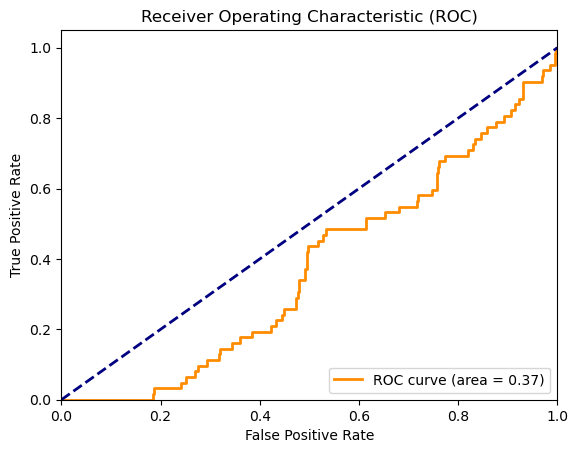

In [196]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()